In [17]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot

In [18]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist

In [19]:
# mnist["data"].shape

checkpoint1

In [20]:
# dict={}
# i=1
# for col in mnist["data"].columns:
#     dict[col]=f"X{i}"
#     i+=1
# Data=mnist["data"]
# Data.rename(columns=dict,
#           inplace=True)

In [21]:
# for i in range(0,10):
#     Data.insert(len(Data.columns),f"Y{i}",0,True)
# Target=mnist["target"]
# for i in range(0,7000):
#     t=int(Target[i])
#     Data.iloc[i,-10+t]=1

In [22]:
data_Y = pd.read_csv('training_labels.txt',header=None)
data_Y


,0
0,0
1,4
2,4
3,7
4,7
...,...
4995,3
4996,6
4997,3
4998,9


In [23]:
data_X = pd.read_csv("training_images.txt", delimiter='\t', header=None)
for i in range(784):
    data_X.rename(columns={i : 'x'+str(i)}, inplace=True)
data_X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x774,x775,x776,x777,x778,x779,x780,x781,x782,x783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [24]:
def displayData(data_X, indices, example_width=None, figsize=(14, 14)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    X1 = data_X.iloc[:,:].values
    X = X1[rand_indices, :]
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

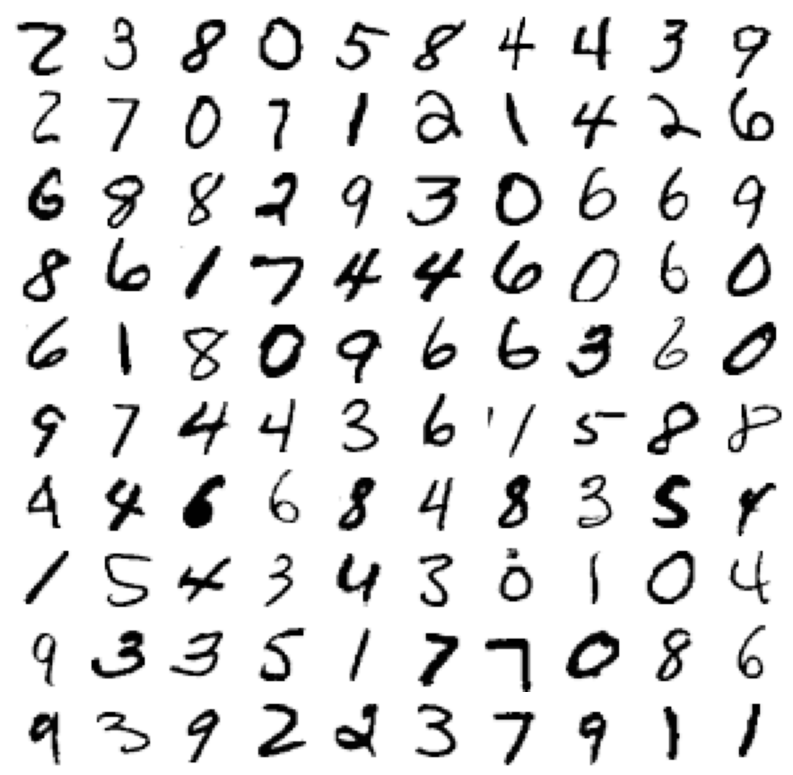

In [25]:
rand_indices = np.random.choice(5000, 100, replace=False)
displayData(data_X, rand_indices)

In [26]:
for i in range(10):
    data_X["y"+str(i)] = (data_Y.loc[:,0] == i)*1
Data = data_X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
Data.shape

(5000, 794)

In [30]:
Training_Set=Data.iloc[0:3750,:]
Testing_Set=Data.iloc[3750:5000,:]

Check Point 2
Implementing forward propagations to a row of Data,
inputs:X1-X784 list , W(1),w(2)
outputs:activations of hidden layer and output layer

Creatinng W1 AND W2 of dimensions n X 785 and 10 x n+1


In [31]:
n=78

In [32]:
e1=math.sqrt(6)/(math.sqrt(784)+math.sqrt(n))
W1=2*e1*(np.random.rand(n,785)-1/2) 
#uniform distribution from(-e1,e1)

In [33]:
e2=math.sqrt(6)/(math.sqrt(n)+math.sqrt(10))
W2=2*e2*(np.random.rand(10,n+1)-1/2)

In [34]:
def g(x):
    if(x>500):
        return 1
    if(x<-500):
        return 0
    return 1/(1+math.exp(-x))

Sigmoid Function

Check Point 3

In [35]:
def forward_propagation(W1,W2,data_point):
    x=np.array(data_point[0:784])
    y=np.array(data_point[784:])
    z1=np.dot(W1[:,1:],x)+W1[:,0]
    a1= np.array([g(xi) for xi in z1])
    z2=np.dot(W2[:,1:],a1)+W2[:,0]
    a2=np.array([g(xi) for xi in z2])
    return x,a1,a2,y
    

forward_propagation(W1,W2,Data.iloc[0,:])

checkpoint 4
creating cross entropy cost function


In [36]:
def point_cost(a2,y):
    Cost=0
    for i in range(0,10):
        Cost=Cost+y[i]*math.log(a2[i])+(1-y[i])*math.log(1-a2[i])
    return Cost
    

checkpoint 5
Applying backpropagation to get delta matrix and individual deltas


In [37]:
def backward_propagation(x,a1,a2,y,W1,W2):
    del_2=a2-y
    del_g=np.array([a*(1-a)for a in a1])
    partial_del_1=np.dot(del_2,W2[:,1:])
    del_1=np.array([partial_del_1[i]*a1[i]*(1-a1[i]) for i in range(0,a1.size)])
    return del_1,del_2

In [38]:
def point_gradient(X,W1,W2,a1,del_1,del_2):
    W1=0*W1
    W2=0*W2
    for i in range(0,W1.shape[0]):
        W1[i,0]=del_1[i]
        for j in range(1,W1.shape[1]):
            W1[i,j]=del_1[i]*X[j-1]
    for i in range(0,W2.shape[0]):
        W2[i,0]=del_2[i]
        for j in range(1,W2.shape[1]):
            W2[i,j]=del_2[i]*a1[j-1]
    return W1,W2

In [39]:
x,a1,a2,y=forward_propagation(W1,W2,Data.iloc[0,:])

In [40]:
del_1,del_2=backward_propagation(x,a1,a2,y,W1,W2)

In [41]:
del_W1,del_W2=point_gradient(Data.iloc[0,0:784],W1,W2,a1,del_1,del_2)

checkpoint 7 creating gradient descent


In [42]:
def gradient_descent(Training_Set,Validation_Set,W1,W2):
    epoch=0
    n=Training_Set.shape[0]
    while(epoch!=10):
        DW1=0*W1
        DW2=0*W2
        for i in range(0,n):
            x,a1,a2,y=forward_propagation(W1,W2,Training_Set.iloc[i,:])
            del_1,del_2=backward_propagation(x,a1,a2,y,W1,W2)
            del_W1,del_W2=point_gradient(Training_Set.iloc[i,0:784],W1,W2,a1,del_1,del_2)
            DW1=DW1+del_W1
            DW2=DW2+del_W2
        W1=W1+DW1/n
        W2=W2+DW2/n
        print(Error_cross_entropy(Validation_Set,W1,W2))
        epoch=epoch+1
            
        
    

In [43]:
gradient_descent(Training_Set,Testing_Set,W1,W2)

KeyboardInterrupt: 

checkpoint8 imlementing the above using gradient descent 


In [ ]:
def Error_cross_entropy(Data,W1,W2):
    error=0
    for i in range(0,Data.shape[0]):
        x,a1,a2,y=forward_propagation(W1,W2,Data.iloc[i,:])
        error=error+point_cost(a2,y)
    error=error/Data.shape[0]
    return error

In [ ]:
Error_cross_entropy(Data,W1,W2)

creating prediction function


In [ ]:
def predict(X,W1,W2):
    z1=np.dot(W1[:,1:],x)+W1[:,0]
    a1= np.array([g(xi) for xi in z1])
    z2=np.dot(W2[:,1:],a1)+W2[:,0]
    a2=np.array([g(xi) for xi in z2])
    result=np.where(a2==np.amax(a2))[0]
    return result

checkpoint 9 implementing batch gradient descent